# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [5]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [6]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


In [7]:
idx_pos = [i for i, x in enumerate(labels) if x == 'POSITIVE']
idx_neg = [i for i, x in enumerate(labels) if x == 'NEGATIVE']

pos_reviews = [reviews[i] for i in idx_pos]
neg_reviews = [reviews[i] for i in idx_neg]

print(len(pos_reviews), len(neg_reviews))

12500 12500


In [8]:
pos_words = [word for review in pos_reviews for word in review.split()]
neg_words = [word for review in neg_reviews for word in review.split()]
tot_words = [word for review in reviews for word in review.split()]

pos_word_cnts = Counter(pos_words)
neg_word_cnts = Counter(neg_words)
tot_word_cnts = Counter(tot_words)

print(tot_word_cnts.most_common(100))

[('the', 336713), ('.', 327192), ('and', 164107), ('a', 163009), ('of', 145864), ('to', 135720), ('is', 107328), ('br', 101872), ('it', 96352), ('in', 93968), ('i', 87623), ('this', 76000), ('that', 73245), ('s', 65361), ('was', 48208), ('as', 46933), ('for', 44343), ('with', 44125), ('movie', 44039), ('but', 42603), ('film', 40155), ('you', 34230), ('on', 34200), ('t', 34081), ('not', 30626), ('he', 30138), ('are', 29430), ('his', 29374), ('have', 27731), ('be', 26957), ('one', 26789), ('all', 23978), ('at', 23513), ('they', 22906), ('by', 22546), ('an', 21560), ('who', 21433), ('so', 20617), ('from', 20498), ('like', 20276), ('there', 18832), ('her', 18421), ('or', 18004), ('just', 17771), ('about', 17374), ('out', 17113), ('if', 16803), ('has', 16790), ('what', 16159), ('some', 15747), ('good', 15143), ('can', 14654), ('more', 14251), ('she', 14223), ('when', 14182), ('very', 14069), ('up', 13291), ('time', 12724), ('no', 12717), ('even', 12651), ('my', 12503), ('would', 12436), ('w

차집합으로 긍정 또는 부정에만 등장하는 단어 찾기

In [9]:
pos_words = pos_word_cnts.most_common()[0:1000]
neg_words = neg_word_cnts.most_common()[0:1000]

pos_words = set([word for word, _ in pos_words])
neg_words = set([word for word, _ in neg_words])

pos_words = pos_words - neg_words
neg_words = neg_words - pos_words

In [10]:
predictions = []
size = 100
for review in reviews[0:size]:
    pos_cnt = [review.count(word) for word in pos_words]
    neg_cnt = [review.count(word) for word in neg_words]
    
    predictions.append('POSITIVE' if pos_cnt > neg_cnt else 'NEGATIVE')
    
print(len(predictions))
result = [x == y for x, y in zip(labels[0:size], predictions)]
print(sum(result)/len(result))

100
0.48


특정 단어가 (긍정에서 등장한 개수/부정에서 등장한 개수) 비율 계산

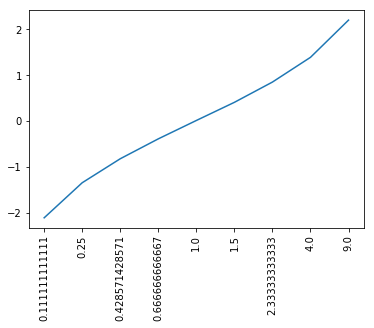

In [17]:
# 등장 횟수 비율에 따른 점수값 표현
def get_score(ratio):
    res = 0
    if(ratio > 1):
        res = np.log(ratio)
    else:
        res = -np.log((1 / (ratio+0.01)))
    return res

def get_score_word(word):
    pos_neg_ratio = pos_word_cnts[word] / float(neg_word_cnts[word]+1)
    return get_score(pos_neg_ratio)

cnt1 = np.array([1,2,3,4,5,6,7,8,9])
cnt2 = cnt1[::-1]
ratios = cnt1/cnt2

pos_neg_ratios = []
    
for ratio in ratios:
    pos_neg_ratios.append(get_score(ratio))

plt.plot(range(len(pos_neg_ratios)), pos_neg_ratios)
plt.xticks(range(len(pos_neg_ratios)), ratios, rotation='vertical')
plt.show()        

In [18]:
pos_neg_ratios = Counter()

for term, cnt in list(tot_word_cnts.most_common()):
    if(cnt > 1000):
        pos_neg_ratio = pos_word_cnts[term] / float(neg_word_cnts[term]+1)
        pos_neg_ratios[term] = get_score(pos_neg_ratio)

print(list(pos_neg_ratios.most_common(10)))
print(list(reversed(pos_neg_ratios.most_common()))[0:10])

[('wonderful', 1.5645425925262093), ('excellent', 1.4647538505723599), ('amazing', 1.3919815802404802), ('favorite', 1.2668956297860055), ('perfect', 1.246742480713785), ('brilliant', 1.2287554137664785), ('loved', 1.1563661500586044), ('highly', 1.1420208631618658), ('today', 1.1050431789984001), ('beautiful', 0.97326301262841053)]
[('waste', -2.4907515123361046), ('worst', -2.1930856334332267), ('awful', -2.1385076866397488), ('horrible', -1.844894301366784), ('crap', -1.7677639636718392), ('worse', -1.6820086052689358), ('terrible', -1.6742829939664696), ('stupid', -1.6042380193725321), ('boring', -1.4475226133603798), ('bad', -1.3181383703873577)]


In [34]:
predictions = []
size = 200
for review in reviews[0:size]:
    score = sum([get_score_word(word) for word in review.split() if word != '.'])
    predictions.append('POSITIVE' if score > 0 else 'NEGATIVE')
    
print(len(predictions))
result = [x == y for x, y in zip(labels[0:size], predictions)]
print(sum(result)/len(result))

200
0.925
